<a href="https://colab.research.google.com/github/coonalcodes/Airbnb-Bookings-Analysis---Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
# importing libraries to process the data
import pandas as pd
import numpy as np


In [2]:
url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df=pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0




*   Info about the data to check the data type and null values present in our data





In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

There are null values present in name,host_name,last_review,reviews_per_month columns. There is requirement of data cleaning

In [4]:
#Checking the exact count of null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We will have to remove some unimportant columns from our data and fill the null values with 0 to proceed with the data.
For ex. we can fill null values in reviews_per_month column with 0, which will mean that there are no revieiws in that month. We can drop the columns like, host_name as we have host_id with us which are unique. We can also remove last_review as it will not be very significant for our analysis. 

In [5]:
#dropping the columns host_name and last_review
df.drop(['host_name','last_review'],axis=1, inplace=True)

In [6]:
#checking whether we have dropped correct columns
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [7]:
#replacing null values with '0'
df.fillna({'reviews_per_month':0}, inplace=True)
#checking the correctness of the code
df.reviews_per_month.isnull().sum()

0

In [8]:
#checking the unique values in the neighbourhoods & neighbourhood groups
unique_neighourhood=df['neighbourhood'].unique()
unique_neighourhood_groups=df['neighbourhood_group'].unique()
print(len(unique_neighourhood))
print(len(unique_neighourhood_groups))
#There are 221 neighbourhoods & 5 neighbourhood groups which are unique

221
5


In [9]:
#importing important liabraries
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
top_15_neighbourhoods=df.neighbourhood.value_counts().head(15)
top_15_neighbourhoods

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64

Text(0, 0.5, 'Number of listings ')

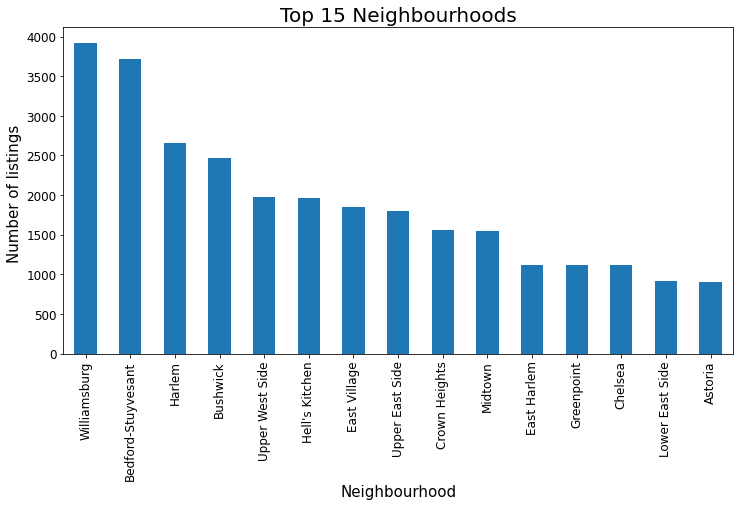

In [11]:
top_15_neighbourhoods = top_15_neighbourhoods.plot.bar(figsize = (12,6), fontsize = 12)
top_15_neighbourhoods.set_title('Top 15 Neighbourhoods',fontsize = 20)
top_15_neighbourhoods.set_xlabel('Neighbourhood',fontsize = 15)
top_15_neighbourhoods.set_ylabel('Number of listings ',fontsize = 15)


In [12]:
Grouping_neighbourhoods = df.groupby('neighbourhood_group')['neighbourhood'].count().sort_values()
Grouping_neighbourhoods.head()
Grouping_neighbourhoods.sum()

48895

Text(0, 0.5, 'Neighbourood listings ')

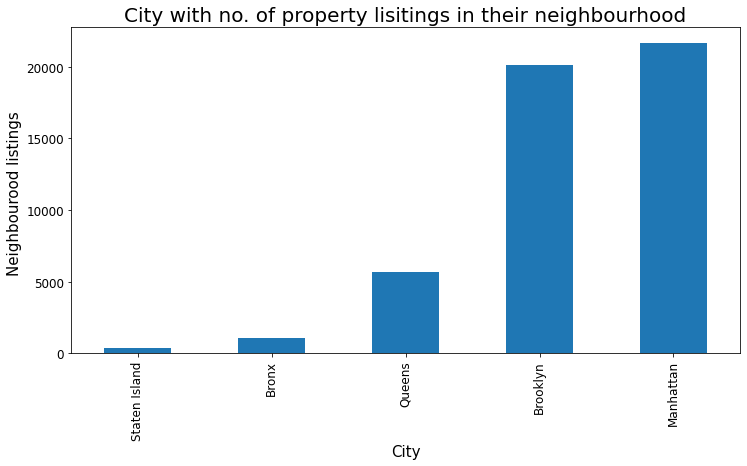

In [13]:
Grouping_neighbourhoods = Grouping_neighbourhoods.plot.bar(figsize = (12,6), fontsize = 12)
Grouping_neighbourhoods.set_title('City with no. of property lisitings in their neighbourhood',fontsize = 20)
Grouping_neighbourhoods.set_xlabel('City',fontsize = 15)
Grouping_neighbourhoods.set_ylabel('Neighbourood listings ',fontsize = 15)


We can clearly see that Manhattan has the most lsitings amongst all the Cities and it is very obvious as it is one of most popular city for travellers around the world.

Now let's check the price pattern in different cities, to check the cheapest and costliest city to stay.

In [14]:
#lets check if there is a need of data cleaning in pricing
price_pattern=pd.DataFrame(df['price'].describe()).T
price_pattern

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0


We can see that, 75% of the values are falling in the price range of 175 and maximum value is 10,000. It means that an outlier is present in our data.
We will take only those values which are close to our top 75% prices.


In [15]:
175*2.5

437.5

In [16]:
#Removing outliers from price column and forming a new data set
df=df[(df['price']>0) & (df['price']<440)]      #approx 175*2.5
#Checking the code
df['price'].max()

439

In [17]:
City_price_pattern=df.groupby('neighbourhood_group')['price'].mean().sort_values()
City_price_pattern_df=pd.DataFrame(City_price_pattern)
City_price_pattern_df

,price
neighbourhood_group,
Bronx,79.650882
Staten Island,90.163934
Queens,91.295689
Brooklyn,110.075234
Manhattan,156.951121


In [18]:
import matplotlib.image as mpimg
%matplotlib inline

Text(0, 0.5, 'Avg Price')

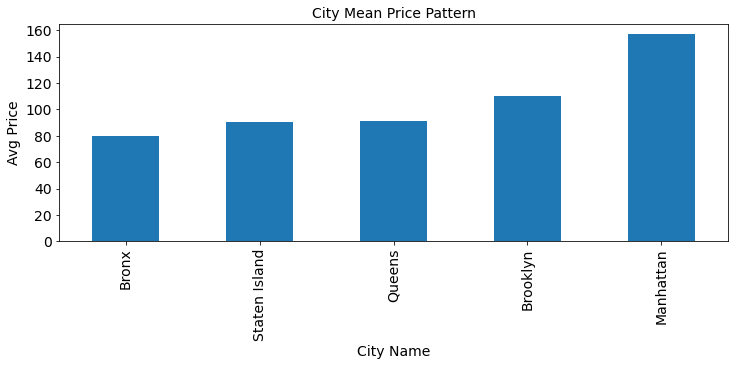

In [19]:
mean_price_plot=City_price_pattern.plot.bar(figsize=(12,4),fontsize=14)
mean_price_plot.set_title('City Mean Price Pattern', fontsize=14)
mean_price_plot.set_xlabel('City Name', fontsize=14)
mean_price_plot.set_ylabel('Avg Price', fontsize=14)


Lets check which room type is most demanding

In [20]:
df['room_type'].value_counts()
# We have most listings of Entire home/apt

Entire home/apt    23990
Private room       22125
Shared room         1146
Name: room_type, dtype: int64

In [21]:
prices_roomtype=df.groupby('room_type')['price'].mean()
prices_roomtype
#Entire home/apt is costliest and shared room is cheapest

room_type
Entire home/apt    173.234931
Private room        80.887006
Shared room         62.149215
Name: price, dtype: float64

In [22]:
#Data analysis on Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
sub_1_private_rooms=sub_1.loc[sub_1['room_type'] == 'Private room']
costlier_private_rooms=sub_1_private_rooms[sub_1_private_rooms['price']>150]
Top_host_brooklyn=costlier_private_rooms['host_id'].value_counts().head(10)
Top_host_brooklyn

1177497      9
417504       9
69124870     3
104626152    3
758441       3
152394865    3
198861577    3
47554473     2
5541374      2
33782884     2
Name: host_id, dtype: int64

Text(0, 0.5, 'No. of Properties which cost > $150')

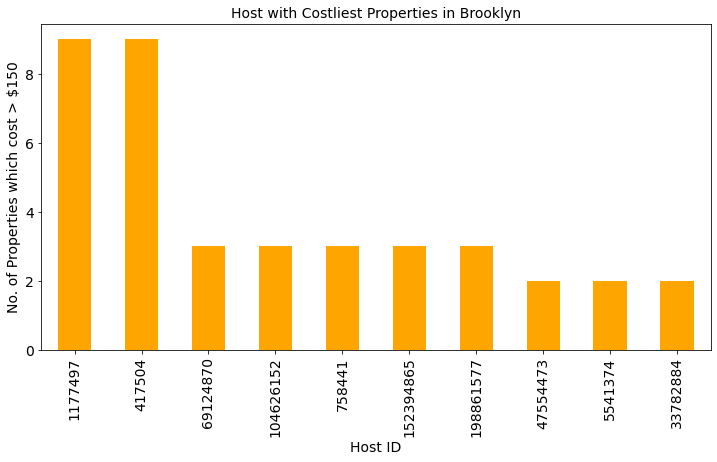

In [23]:
Brooklyn_costlier_private_rooms=Top_host_brooklyn.plot.bar(figsize=(12,6),fontsize=14,color='orange')
Brooklyn_costlier_private_rooms.set_title('Host with Costliest Properties in Brooklyn',fontsize=14)
Brooklyn_costlier_private_rooms.set_xlabel('Host ID',fontsize=14)
Brooklyn_costlier_private_rooms.set_ylabel('No. of Properties which cost > $150',fontsize=14)

From above chart we can say that, these host are having most properties in Brooklyn with premium category which will cost more than $150.
For someone who is looking for a trip to Brooklyn with descent budget can direclty contact these host to book the property in Brooklyn

Text(0.5, 1.0, 'Price Distribution as per City')

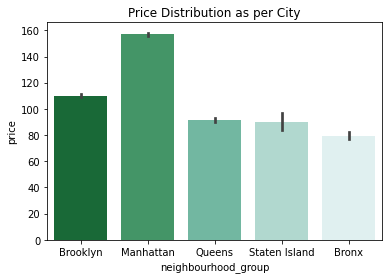

In [24]:
#using barplot to showcase density and distribtuion of prices 
Fig_3=sns.barplot(data=df, x='neighbourhood_group', y='price',palette='BuGn_r' )
Fig_3.set_title('Price Distribution as per City')


We can see that Manhatten & Brooklyn are the costliest destinations for trvellers, whereas Bronx is the cheapest one

In [25]:
df.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [26]:
df['number_of_reviews'].value_counts().head(10)

0    9444
1    5063
2    3371
3    2444
4    1942
5    1557
6    1311
7    1147
8    1099
9     941
Name: number_of_reviews, dtype: int64

In [46]:
x=df.groupby('host_id')['number_of_reviews'].mean()
y=x.head(20).reset_index().sort_values('number_of_reviews')
y

,host_id,number_of_reviews
13,4632,0.0
0,2438,1.0
6,3151,1.0
9,3563,1.0
4,2868,2.0
8,3415,4.0
17,6485,4.0
18,7192,9.0
16,6041,14.0
2,2787,17.5


In [27]:
Grouping_review_with_host=df.groupby('host_id')['number_of_reviews'].mean().head(20).reset_index()
Grouping_review_with_host.sort_values('number_of_reviews', ascending=False, inplace =True)
Top_host=Grouping_review_with_host.iloc[:]
Top_host

,host_id,number_of_reviews
14,4869,270.0
5,2881,195.0
19,7209,108.0
11,3867,86.0
12,4396,54.0
10,3647,54.0
15,5089,43.0
1,2571,27.0
3,2845,23.0
7,3211,21.0


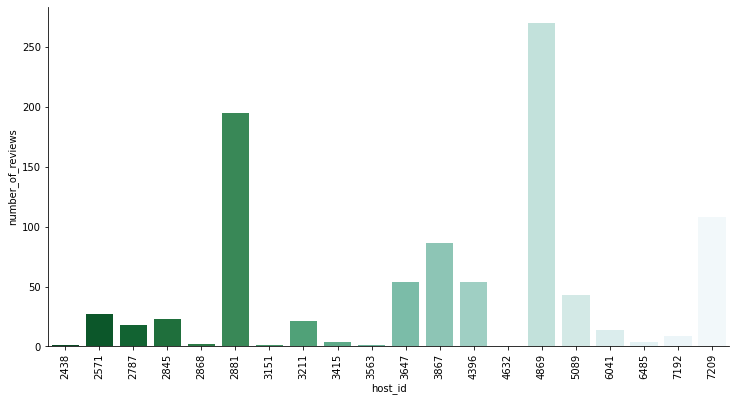

In [28]:
Fig_3=sns.catplot(data=Top_host, x='host_id', y='number_of_reviews', palette='BuGn_r',kind='bar',height=2,aspect=8 )
Fig_3.set_xticklabels(rotation=90)
Fig_3.fig.set_size_inches(10,7.5)


In [29]:
top_host=df.groupby('host_id')['reviews_per_month'].mean().head(50).reset_index()
top_host.sort_values('reviews_per_month', ascending=False, inplace =True)
top_host = top_host.iloc[:,0]
Top_host_by_review_rate = df.loc[df['host_id'].isin(top_host)]
Top_host_by_review_rate = Top_host_by_review_rate.sort_values('reviews_per_month')
# Grouping_review_with_host.sort_values('number_of_reviews', ascending=False, inplace =True)
# Top_host=Grouping_review_with_host.iloc[:]
# Top_host
Top_host_by_review_rate

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
42353,32865732,Park views and city fun for July & August,11175,Brooklyn,Prospect-Lefferts Gardens,40.66220,-73.96208,Entire home/apt,130,30,0,0.00,1,129
23089,18692321,Amazing loft with a great view,14444,Brooklyn,Bedford-Stuyvesant,40.69347,-73.95500,Entire home/apt,126,20,0,0.00,2,0
22982,18612788,Awesome loft with Amazing views,14444,Brooklyn,Bedford-Stuyvesant,40.69321,-73.95599,Entire home/apt,150,4,0,0.00,2,0
36,11452,Clean and Quiet in Brooklyn,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0.00,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,12221,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276
202,54158,The Institute—Heart of Williamsburg,10889,Brooklyn,Williamsburg,40.71950,-73.95976,Entire home/apt,249,2,358,3.44,2,164
7,5178,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194


In [30]:
df['reviews_per_month'].max()

58.5

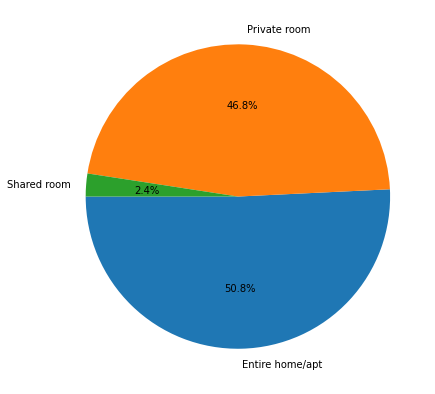

,room_type,room_type count,percentage
0,Entire home/apt,23990,50.760669
1,Private room,22125,46.814498
2,Shared room,1146,2.424832


In [31]:
room_types = df.room_type.value_counts().reset_index().rename(columns = {'index':'room_type', 'room_type': 'room_type count'})

# compute numbers in percentage
room_types['percentage'] = ((room_types['room_type count'])/(room_types['room_type count'].sum()))*100
room_types.set_index('room_type')

# # Creating plot pie plot
pie_chart = plt.figure(figsize =(10, 7))
pie_chart = plt.pie(room_types['room_type count'], labels =room_types.room_type,autopct = "%1.1f%%", startangle =180 )
 
# show plot
plt.show()
room_types

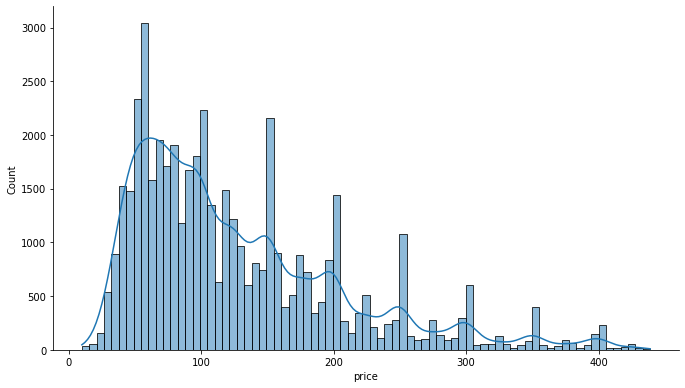

In [37]:
# let us check price density distribution
sns.displot(data=df, x="price", kde=True,height=5.5, aspect=1.75)

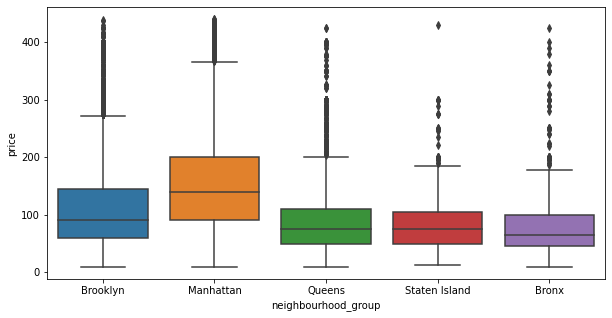

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='neighbourhood_group', y='price')

In [108]:
z=df.sort_values('reviews_per_month').sort_index()
z.sort_values('reviews_per_month', ascending=False, inplace=True)
y=z.head(15)
q=y.iloc[:,2]
q

42075    244361589
42076    244361589
38870    228415932
27287    156684502
28651    156684502
29628    156684502
20403     26432133
22469     26432133
36238    217379941
40297    232251881
40036    232251881
42077    244361589
11759     47621202
21517     26432133
44764    259630588
Name: host_id, dtype: int64

In [117]:
Top_30_reviewed_host= df.loc[df['host_id'].isin(q)]
Top_30_reviewed_host.sort_values('reviews_per_month',ascending=False,inplace=True)
# z.plot.line(x='host', y='reviews_per_month')
Top_30_reviewed_host.reset_index()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,58.50,9,299
1,42076,32678720,Great Room in the heart of Times Square!,244361589,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,27.95,9,299
2,38870,30423106,Lou's Palace-So much for so little,228415932,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,20.94,1,134
3,27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,19.75,3,26
4,28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,17.82,3,25
5,29628,22750161,JFK 3 Comfort 5 Mins from JFK Private Bedroom,156684502,Queens,Springfield Gardens,40.66298,-73.77000,Private room,50,1,302,16.81,3,26
6,20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
7,22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,16.03,5,337
8,36238,28826608,“For Heaven Cakes”,217379941,Queens,Springfield Gardens,40.66457,-73.76918,Entire home/apt,75,1,132,15.78,1,28
9,40297,31249784,Studio Apartment 6 minutes from JFK Airport,232251881,Queens,Jamaica,40.66793,-73.78452,Private room,67,1,95,15.32,8,145


[Text(0, 0, '26432133'),
 Text(0, 0, '47621202'),
 Text(0, 0, '156684502'),
 Text(0, 0, '217379941'),
 Text(0, 0, '228415932'),
 Text(0, 0, '232251881'),
 Text(0, 0, '244361589'),
 Text(0, 0, '259630588')]

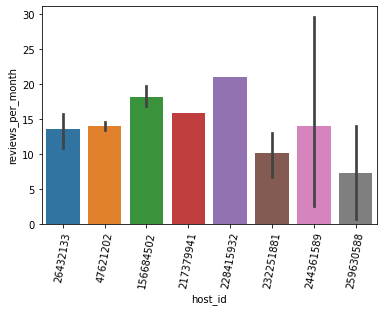

In [140]:
w=Top_30_reviewed_host.iloc[:,2:13:9]
# w.reset_index()
plot=sns.barplot(x='host_id', y='reviews_per_month',data=w)
plot.set_xticklabels(plot.get_xticklabels(), rotation=80)

In [101]:
review_rate = df.groupby('host_id')['reviews_per_month'].mean().head(5).reset_index()
review_rate.sort_values('reviews_per_month', ascending=False, inplace =True)
review_rate = review_rate.iloc[:,0]
review_rate
### Make a different dataframe conataining information of only these top 1000 host
# Top_host_by_review_rate = df.loc[df['host_id'].isin(review_rate)]
# # # Top_host_by_review_rate = Top_host_by_review_rate.sort_values('reviews_per_month'),
# Top_host_by_review_rate

2    2787
1    2571
3    2845
0    2438
4    2868
Name: host_id, dtype: int64

In [102]:
### Make a different dataframe conataining information of only these top 1000 host
Top_host_by_review_rate = df.loc[df['host_id'].isin(review_rate)]
# # # Top_host_by_review_rate = Top_host_by_review_rate.sort_values('reviews_per_month'),
Top_host_by_review_rate

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2290,1101224,THE PUTNAM,2571,Brooklyn,Bedford-Stuyvesant,40.68674,-73.93845,Entire home/apt,182,9,27,0.37,1,23
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,0.43,6,180
16512,13234457,Cozy Clinton Hill Crib On Classon,2868,Brooklyn,Bedford-Stuyvesant,40.68258,-73.95871,Entire home/apt,60,29,2,0.06,1,221
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,0.70,6,360
22728,18393354,Midtown Sanctuary,2845,Manhattan,Midtown,40.75358,-73.99190,Shared room,99,1,1,0.08,2,365
